In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
X=iris.data
Y=iris.target

In [8]:
feature_names=iris.feature_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

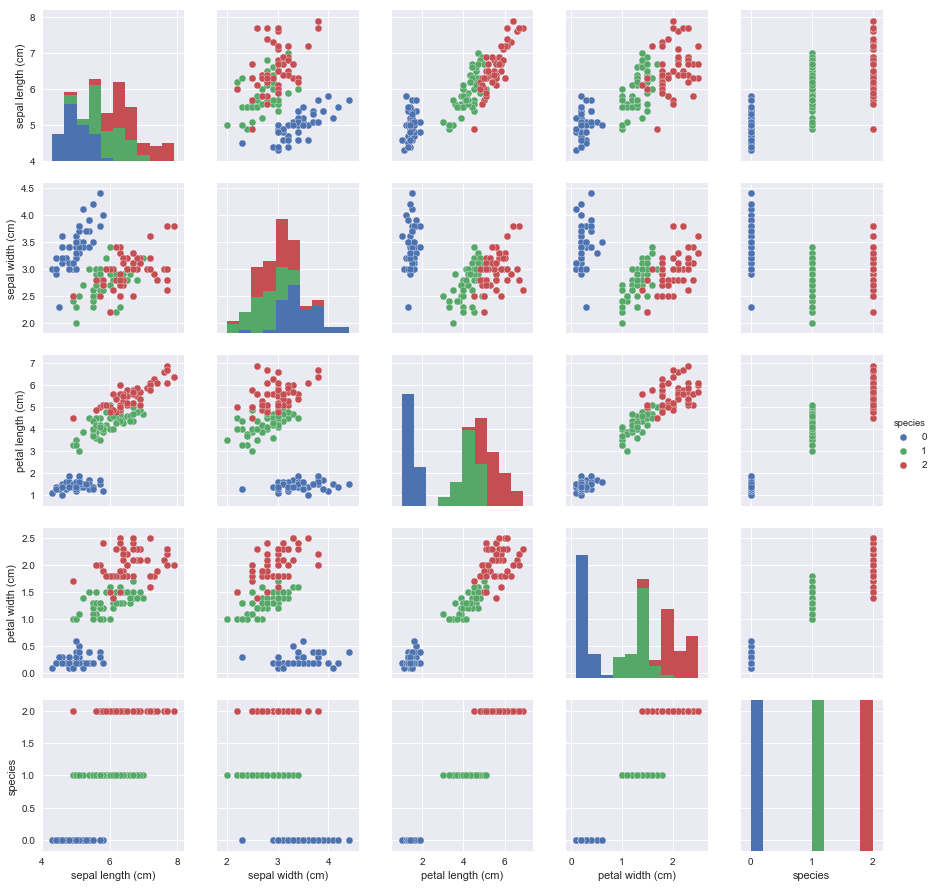

In [14]:
#変数二つをペアにして可視化
a=pd.DataFrame(X,columns=feature_names)
b=pd.DataFrame(Y,columns=['species'])
c=pd.concat((a,b),axis=1)
import seaborn as sns
sns.pairplot(c,hue='species')
plt.show()

PCAクラスを用いてPCAを行う。<br>
PCAにはデータの標準化が必須。

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X) # 与えられた行列の各特徴量について､平均と標準偏差を算出
X_std=scaler.fit_transform(X) #fitで求めた値を利用して標準化をする

In [18]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4) #元のデータの次元が４だからmaxで４
X_pca = pca.fit_transform(X_std)

In [20]:
X_pca[:10]

array([[-2.26454173,  0.5057039 , -0.12194335, -0.02307332],
       [-2.0864255 , -0.65540473, -0.22725083, -0.10320824],
       [-2.36795045, -0.31847731,  0.05147962, -0.02782523],
       [-2.30419716, -0.57536771,  0.09886044,  0.06631146],
       [-2.38877749,  0.6747674 ,  0.02142785,  0.03739729],
       [-2.07053681,  1.51854856,  0.03068426, -0.00439877],
       [-2.44571134,  0.07456268,  0.34219764,  0.03809657],
       [-2.23384186,  0.24761393, -0.08257446,  0.02550516],
       [-2.34195768, -1.09514636,  0.1535624 ,  0.02679383],
       [-2.18867576, -0.44862905, -0.24655952,  0.0399073 ]])

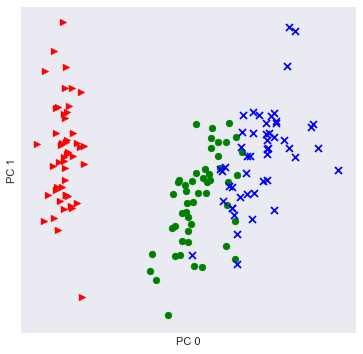

In [21]:
# 特徴抽出による可視化
# PC0とPC1について散布図を表示
plt.figure(figsize=(6, 6))
for target, marker, color in zip(range(3), '>ox', 'rgb'):
    plt.scatter(X_pca[iris.target==target, 0], X_pca[iris.target==target, 1], marker=marker, color=color)
plt.xlabel('PC 0')
plt.ylabel('PC 1')
plt.xticks([])
plt.yticks([])
plt.show()

これだけ見てもあまり違いがわからないので**寄与率**で見て恩恵を感じる。

In [22]:
# 寄与率を出力
# 各主成分の寄与率がarrayの形式で入っている
# [第一主成分の寄与率 第二主成分の寄与率 ...]
print(pca.explained_variance_ratio_)

[ 0.72770452  0.23030523  0.03683832  0.00515193]


In [23]:
# 累積寄与率を出力
# np.cumsum()で固有値の累積をとる
# [第1主成分までの累積寄与率 第2主成分までの累積寄与率 ...]
print(np.cumsum(pca.explained_variance_ratio_))

[ 0.72770452  0.95800975  0.99484807  1.        ]


np.cumsumは配列を引数にして前の値を足していく

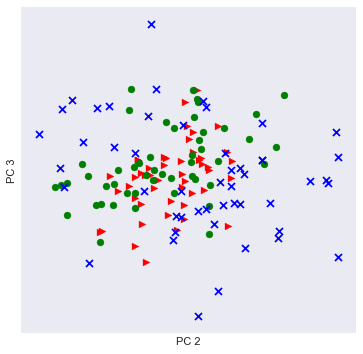

In [24]:
# 特徴抽出による可視化
# PC3とPC4について散布図を表示
plt.figure(figsize=(6, 6))
for target, marker, color in zip(range(3), '>ox', 'rgb'):
    plt.scatter(X_pca[iris.target==target, 2], X_pca[iris.target==target, 3], marker=marker, color=color)
plt.xlabel('PC 2')
plt.ylabel('PC 3')
plt.xticks([])
plt.yticks([])
plt.show()

寄与率の小さい第３、第４主成分では全く区別できない

In [25]:
# 主成分の係数h_jを出力
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

　例えば、第一主成分の式は
 ```
 (第一主成分)=0.5223*（sepal length）-0.2633*(sepal width)+0.5812*(petal length)+0.5656*(petal width)
 ```
 であることを表している

In [26]:
# 固有値lのルートを取る
np.sqrt(pca.explained_variance_)

array([ 1.70611198,  0.95980255,  0.38386622,  0.14355385])

In [27]:
# 因子負荷量を出力
# ['sepal length', 'sepal width', 'petal length', 'petal width']
pca.components_ * np.sqrt(pca.explained_variance_)[:, np.newaxis]

array([[ 0.89122448, -0.44931298,  0.99168442,  0.96499579],
       [ 0.35735211,  0.88835148,  0.02024682,  0.06278622],
       [-0.276774  ,  0.09290825,  0.05408378,  0.24329495],
       [-0.03761047,  0.01782003,  0.11500878, -0.07515708]])

2番目以外の変数が重要っぽい

実際に使うときはあまり意識しないけどね。<br>
X_pca[:2]とすれば２次元に圧縮できたことになる。

In [29]:
# SVMで分類
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
scores_2 = cross_val_score(SVC(), X_pca[:, [0,2]], Y, cv=5)
scores_2.mean()

0.95999999999999996

In [32]:
# 両者の精度を比較
# print('特徴選択: {}'.format(scores_1.mean()))　#特徴選択は恣意的なので今回はやらず
print('特徴抽出: {}'.format(scores_2.mean()))

特徴抽出: 0.96
